In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

It doesn't lose any information unlike Standardization

In [2]:
df=pd.read_csv('wine_data.csv')
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [7]:
df=df.iloc[:,0:3]
df

,1,14.23,1.71
0,1,13.20,1.78
1,1,13.16,2.36
2,1,14.37,1.95
3,1,13.24,2.59
4,1,14.20,1.76
...,...,...,...
172,3,13.71,5.65
173,3,13.40,3.91
174,3,13.27,4.28
175,3,13.17,2.59


In [9]:
df.columns=['Class label','Alcohol','Malic acid']
df.head()


,Class label,Alcohol,Malic acid
0,1,13.20,1.78
1,1,13.16,2.36
2,1,14.37,1.95
3,1,13.24,2.59
4,1,14.20,1.76


<Axes: xlabel='Alcohol', ylabel='Density'>

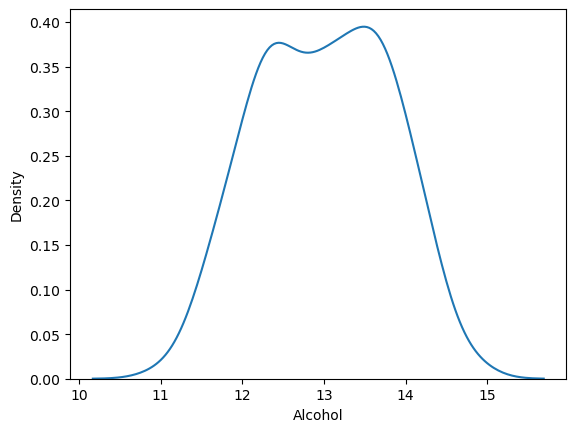

In [10]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

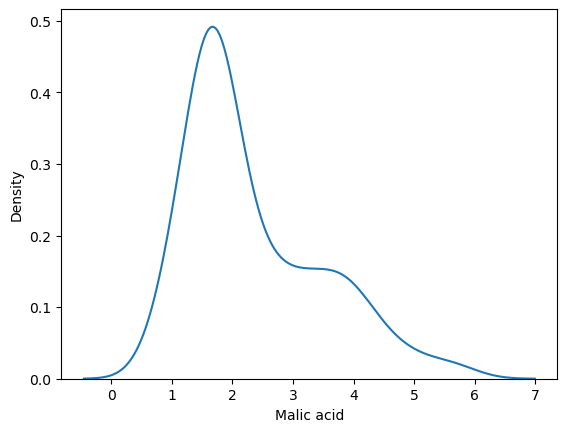

In [11]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

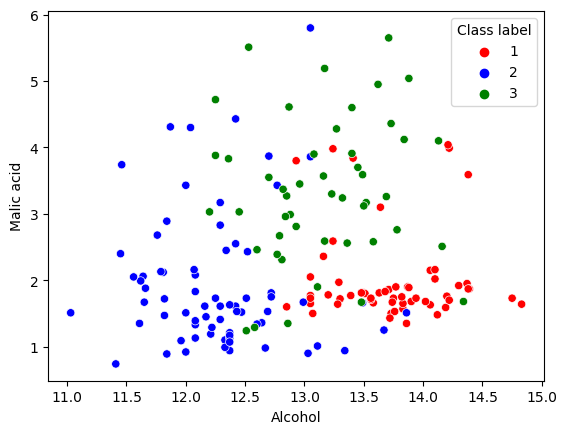

In [15]:
color_disct={1:'red',3:'green',2:'blue'}
sns.scatterplot(x=df['Alcohol'],y=df['Malic acid'],hue=df['Class label'],palette=color_disct)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop("Class label",axis=1),
df['Class label'],random_state=0,test_size=0.3 )

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scaler.fit(x_train)

x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [22]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [23]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic acid
count,123.0,123.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.1
50%,0.5,0.2
75%,0.7,0.4
max,1.0,1.0


Text(0.5, 1.0, 'After Scaling')

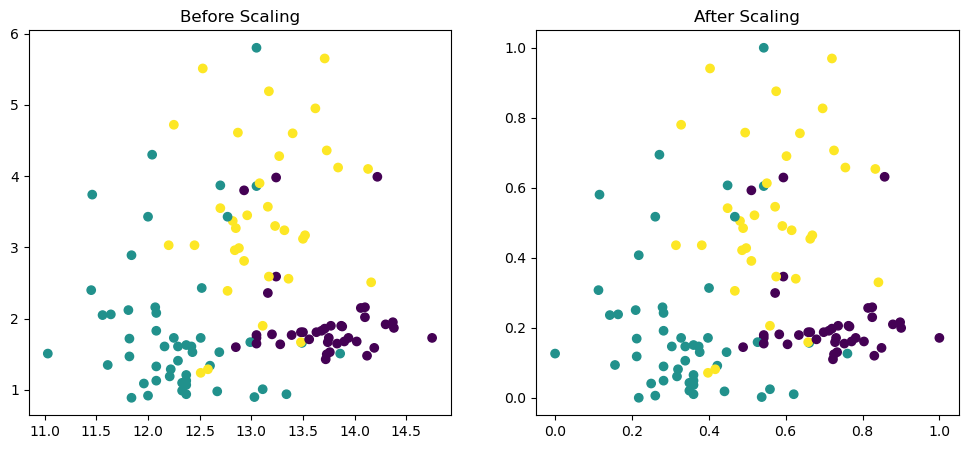

In [24]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x_train['Alcohol'],x_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")

ax2.scatter(x_train_scaled['Alcohol'],x_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")

<Axes: title={'center': 'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

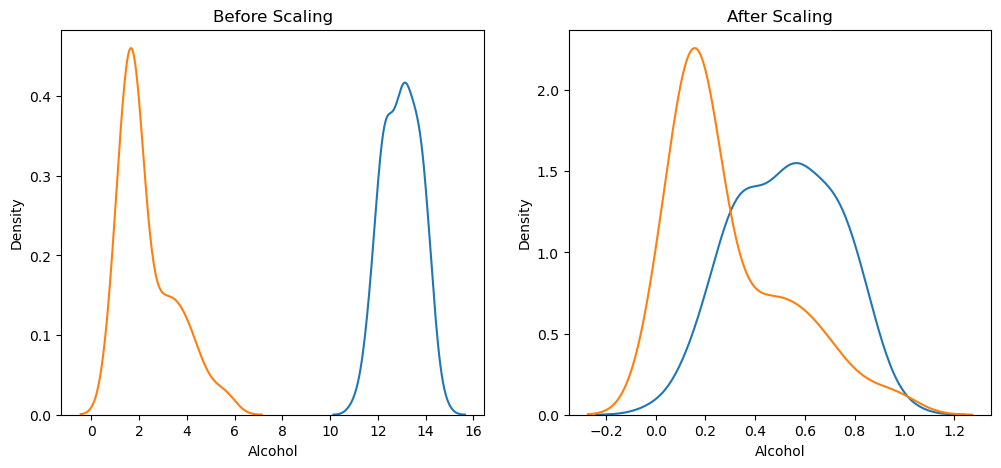

In [25]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Alcohol'],ax=ax1)
sns.kdeplot(x_train['Malic acid'],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(x_train_scaled['Malic acid'],ax=ax2)

